# Classifying minis

This notebook uses fastai to classify old vs new minis

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
from fastai import *
from fastai.vision import *

In [3]:
ROOT_DIR = Path(os.getcwd())
batch_size = 64

## Looking at the data

In [4]:
ls

'1. download_and_ process_images_original.ipynb'   downloads/
'2. classifying_minis.ipynb'                       downloads.zip
'3. download_and_process_data_improved.ipynb'      __MACOSX/


In [5]:
# ! unzip downloads.zip

In [6]:
# data are here:
data_dir = ROOT_DIR/'downloads'
filenames = os.listdir(data_dir)
filepaths = [data_dir/f for f in filenames if not f.startswith(".")]

Verify the images

In [7]:
for f in filepaths :
    print(f)
    verify_images(f, delete=True, max_size=500)

/home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads/new_mini


Image /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads/new_mini/151. 15619_10259_891_1_gilberts_garage_1030.gif has 1 instead of 3 channels
/home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads/old_mini


/home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads/models


/home/lindsay/anaconda3/envs/fastai/lib/python3.7/site-packages/fastprogress/fastprogress.py:95: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [8]:
np.random.seed(123)
data = ImageDataBunch.from_folder(
    data_dir, 
    train=".", 
    valid=".",
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=224,
    num_workers=4).normalize(imagenet_stats)

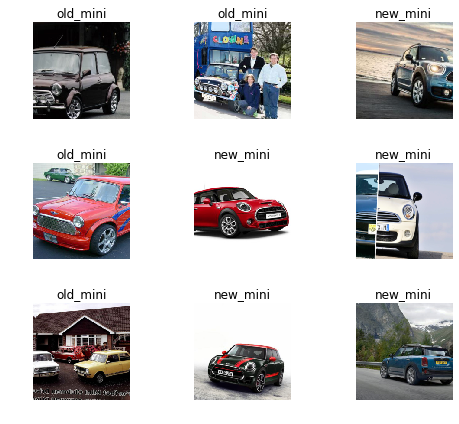

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(data.classes)
len(data.classes),data.c

['new_mini', 'old_mini']


(2, 2)

In [11]:
data.train_ds

LabelList
y: CategoryList (336 items)
[Category new_mini, Category new_mini, Category new_mini, Category new_mini, Category new_mini]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads
x: ImageItemList (336 items)
[Image (3, 375, 500), Image (3, 331, 500), Image (3, 390, 500), Image (3, 181, 499), Image (3, 375, 500)]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads

## Training: resnet34

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


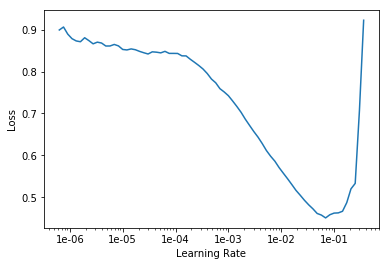

In [13]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, 1e-3)

In [16]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [18]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(8e-5,8e-4))

In [19]:
learn.save("stage-2")

## Results

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

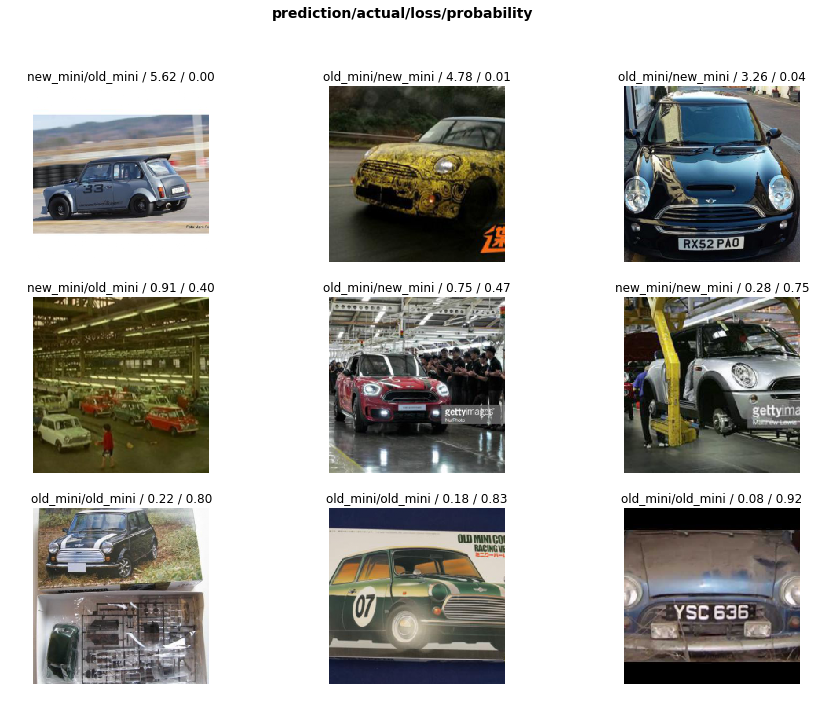

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

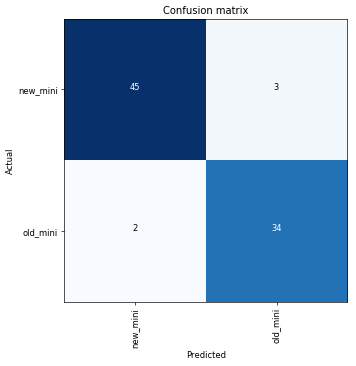

In [22]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

## Training: resnet50

In [30]:
np.random.seed(123)
data = ImageDataBunch.from_folder(
    data_dir, 
    train=".", 
    valid=".",
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=299,
    bs=batch_size//4,
    num_workers=4).normalize(imagenet_stats)

In [31]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


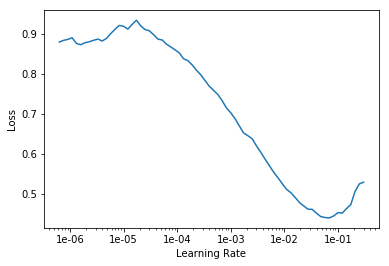

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr=8e-3)

In [41]:
# learn.save('stage-1-50')
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (336 items)
[Category new_mini, Category new_mini, Category new_mini, Category new_mini, Category new_mini]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads
x: ImageItemList (336 items)
[Image (3, 375, 500), Image (3, 331, 500), Image (3, 390, 500), Image (3, 181, 499), Image (3, 375, 500)]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads;

Valid: LabelList
y: CategoryList (84 items)
[Category new_mini, Category new_mini, Category new_mini, Category old_mini, Category new_mini]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads
x: ImageItemList (84 items)
[Image (3, 281, 500), Image (3, 180, 500), Image (3, 308, 500), Image (3, 375, 500), Image (3, 234, 500)]...
Path: /home/lindsay/Tresors/DeepLearning/fastai/fastai-coursework/lesson-1/downloads;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d

In [39]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


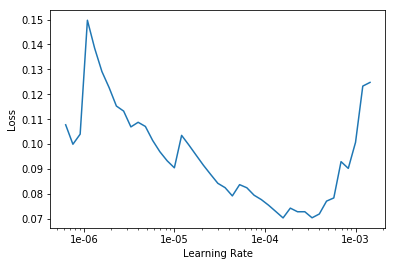

In [36]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,8e-5))

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

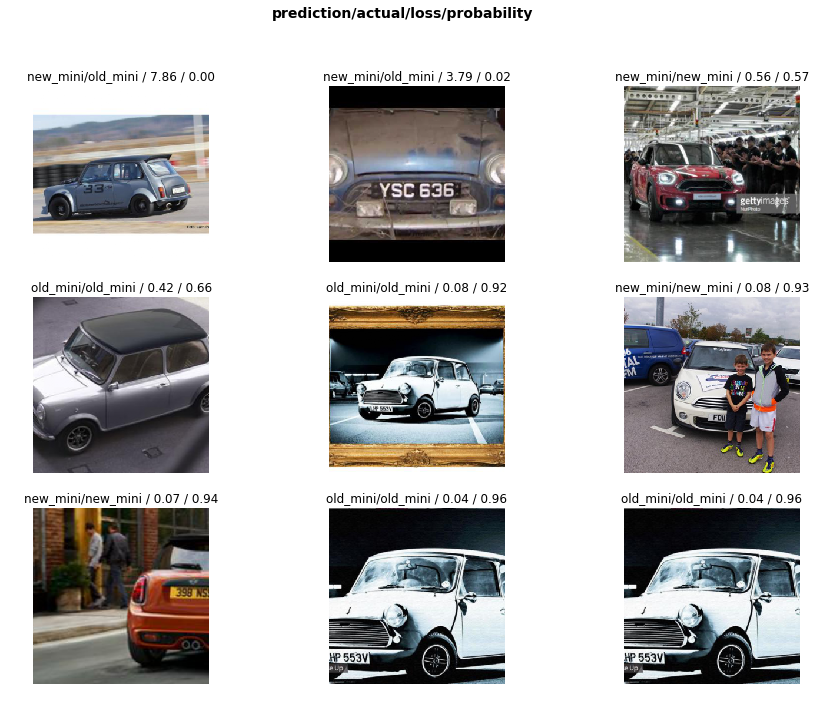

In [43]:
interp.plot_top_losses(9, figsize=(15,11))

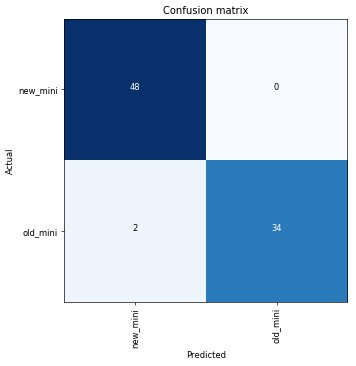

In [44]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [47]:
learn.export()